In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:

!unzip /content/drive/MyDrive/Embedded_Project/leapGestRecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0027.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0028.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0029.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0030.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0031.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0032.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0033.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0034.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0035.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0036.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0037.png  
  inflating: leapGestRecog/leapGestRecog/07/06_index/frame_07_06_0038.png  
  inflating: leapGestRecog/leapGestRe

In [33]:
import shutil


folder_name = "/content/leapGestRecog/leapGestRecog"

shutil.rmtree(folder_name)

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
import os
from google.colab import files


In [35]:

imagepaths = []
for root, dirs, files in os.walk("/content/leapGestRecog", topdown=False):
    for name in files:
        if name.endswith("png"):
            path = os.path.join(root, name)
            imagepaths.append(path)

print(len(imagepaths))

20000


In [36]:


def plot_image(path):
  img = cv2.imread(path)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(img_gray, cmap='gray')
  plt.xlabel('Width')
  plt.ylabel('Height')
  plt.title('Image ' + path)
  plt.grid(False)
  plt.show()


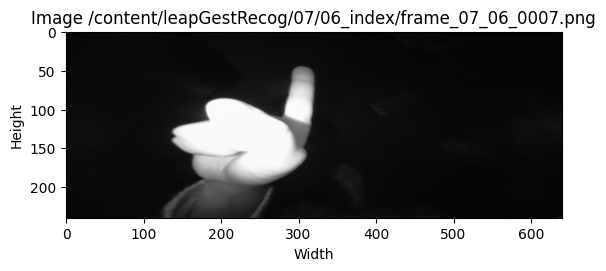

In [37]:
plot_image(imagepaths[10]) 

In [38]:
X = [] 
y = [] 


for path in imagepaths:
  img = cv2.imread(path) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  img = cv2.resize(img, (320, 120)) 
  X.append(img)
  
  category = path.split("/")[3]
  label = int(category.split("_")[0][1]) 
  
  y.append(label)


X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1)
y = np.array(y)
print("labels loaded: ", len(y))
print("images loaded: ", len(X))


labels loaded:  20000
images loaded:  20000


In [39]:
ts = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [40]:

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D


In [41]:

# Define model architecture
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [47]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
     

In [49]:
cnn_model = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
118/118 - 13s - loss: 0.0161 - accuracy: 0.9922 - val_loss: 0.0181 - val_accuracy: 0.9902 - 13s/epoch - 107ms/step
Epoch 2/10
118/118 - 13s - loss: 0.0147 - accuracy: 0.9916 - val_loss: 0.0145 - val_accuracy: 0.9918 - 13s/epoch - 109ms/step
Epoch 3/10
118/118 - 13s - loss: 0.0142 - accuracy: 0.9927 - val_loss: 0.0324 - val_accuracy: 0.9874 - 13s/epoch - 109ms/step
Epoch 4/10
118/118 - 13s - loss: 0.0177 - accuracy: 0.9921 - val_loss: 0.0148 - val_accuracy: 0.9924 - 13s/epoch - 107ms/step
Epoch 5/10
118/118 - 12s - loss: 0.0141 - accuracy: 0.9925 - val_loss: 0.0151 - val_accuracy: 0.9910 - 12s/epoch - 105ms/step
Epoch 6/10
118/118 - 13s - loss: 0.0121 - accuracy: 0.9933 - val_loss: 0.0145 - val_accuracy: 0.9908 - 13s/epoch - 106ms/step
Epoch 7/10
118/118 - 12s - loss: 0.0119 - accuracy: 0.9927 - val_loss: 0.0167 - val_accuracy: 0.9910 - 12s/epoch - 106ms/step
Epoch 8/10
118/118 - 12s - loss: 0.0142 - accuracy: 0.9929 - val_loss: 0.0196 - val_accuracy: 0.9902 - 12s/epoch - 104

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('test accuracy:'.format(test_acc*100))

157/157 [==============================] - 2s 9ms/step - loss: 0.0149 - accuracy: 0.9910
test accuracy:


In [51]:
predictions = model.predict(X_test) 

157/157 [==============================] - 1s 7ms/step


In [52]:
np.argmax(predictions[0]), y_test[0] 


(6, 6)

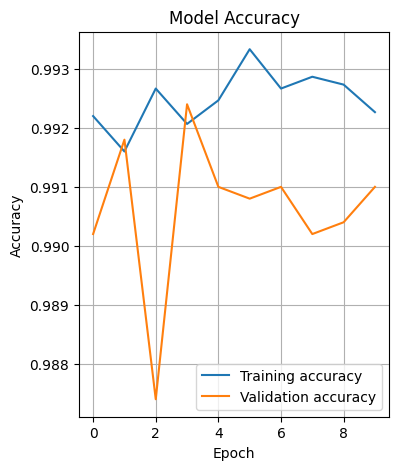

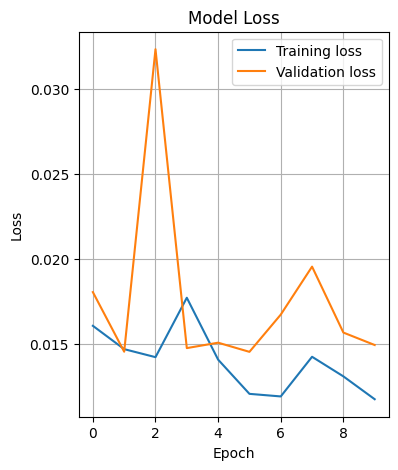

In [53]:
import matplotlib.pyplot as plt

# Plot the accuracy vs epoch
plt.figure(figsize=(4, 5))
plt.plot(cnn_model.history['accuracy'], label='Training accuracy')
plt.plot(cnn_model.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the loss vs epoch
plt.figure(figsize=(4, 5))
plt.plot(cnn_model.history['loss'], label='Training loss')
plt.plot(cnn_model.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
def validate_9_images(predictions_array, true_label_array, img_array):
  
  # Define class names
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  
  # Create a figure with 9 subplots
  fig, axes = plt.subplots(3, 3, figsize=(15, 5))
  
  # Loop over the images and plot them with their predicted and true labels
  for i, ax in enumerate(axes.flat):
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot the image
    ax.imshow(img, cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Determine the predicted label and color based on whether it is correct
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    
    # Add the predicted and true labels as the x-axis label
    ax.set_xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  
  plt.show()

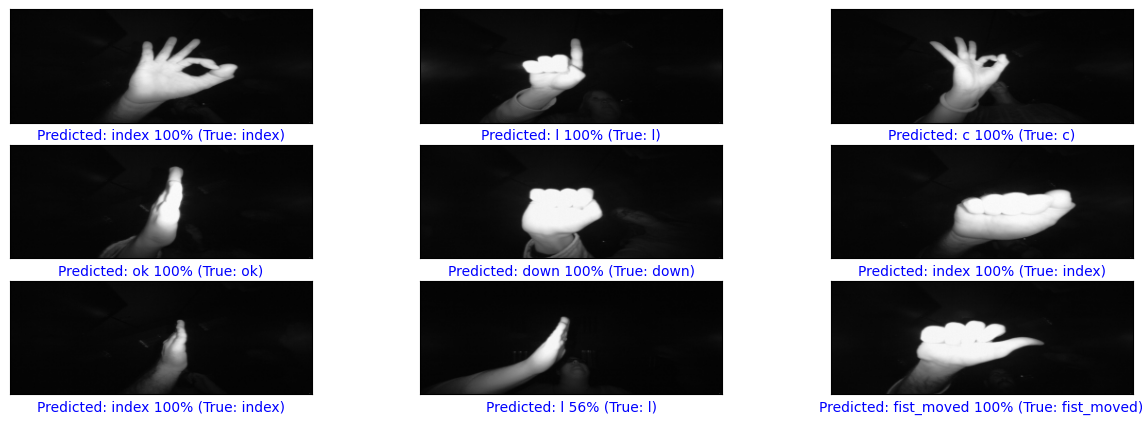

In [55]:
validate_9_images(predictions, y_test, X_test)

In [56]:
y_pred = np.argmax(predictions, axis=1) 

In [57]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names
class_names = ["Thumb Down", "Palm (H)", "L", "Fist (H)", "Fist (V)", "Thumbs up", "Index", "OK", "Palm (V)", "C"]

# Create DataFrame for confusion matrix
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Print confusion matrix
print(df_cm)

            Thumb Down  Palm (H)    L  Fist (H)  Fist (V)  Thumbs up  Index  \
Thumb Down         527         0    0         0         0          0      0   
Palm (H)             0       490    0         0         0          0      0   
L                    0         0  488         0         0         30      0   
Fist (H)             0         0    0       514         0          0      0   
Fist (V)             0         0    0         0       471          0      0   
Thumbs up            0         0   14         0         0        488      0   
Index                0         0    0         0         0          0    481   
OK                   0         0    0         0         0          0      0   
Palm (V)             0         0    0         0         0          0      0   
C                    0         0    0         0         0          0      0   

             OK  Palm (V)    C  
Thumb Down    0         1    0  
Palm (H)      0         0    0  
L             0         0    0 

In [58]:
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense

In [59]:

# Define model architecture
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [60]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
     

In [61]:
cnn_model_2 = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
118/118 - 26s - loss: 2.0222 - accuracy: 0.8211 - val_loss: 0.0352 - val_accuracy: 0.9862 - 26s/epoch - 218ms/step
Epoch 2/10
118/118 - 22s - loss: 0.0204 - accuracy: 0.9915 - val_loss: 0.0160 - val_accuracy: 0.9910 - 22s/epoch - 188ms/step
Epoch 3/10
118/118 - 22s - loss: 0.0187 - accuracy: 0.9921 - val_loss: 0.0143 - val_accuracy: 0.9916 - 22s/epoch - 188ms/step
Epoch 4/10
118/118 - 22s - loss: 0.0182 - accuracy: 0.9915 - val_loss: 0.0193 - val_accuracy: 0.9914 - 22s/epoch - 191ms/step
Epoch 5/10
118/118 - 22s - loss: 0.0153 - accuracy: 0.9927 - val_loss: 0.0182 - val_accuracy: 0.9890 - 22s/epoch - 188ms/step
Epoch 6/10
118/118 - 22s - loss: 0.0143 - accuracy: 0.9923 - val_loss: 0.0164 - val_accuracy: 0.9918 - 22s/epoch - 187ms/step
Epoch 7/10
118/118 - 22s - loss: 0.0149 - accuracy: 0.9919 - val_loss: 0.0129 - val_accuracy: 0.9918 - 22s/epoch - 188ms/step
Epoch 8/10
118/118 - 22s - loss: 0.0126 - accuracy: 0.9927 - val_loss: 0.0150 - val_accuracy: 0.9908 - 22s/epoch - 189

In [62]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

157/157 [==============================] - 2s 10ms/step - loss: 0.0138 - accuracy: 0.9912
Test accuracy: 99.12%
